In [17]:
from ast import Return
from email import header
from operator import contains
from bs4 import BeautifulSoup
import requests
from csv import writer
from pprint import pprint
from re import search
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [61]:
url= "https://id.indeed.com/jobs?q=data%20analyst&l=indonesia&from=searchOnHP&vjk=284ce6d382cca087"
page = requests.get(url)
print(page)

soup = BeautifulSoup(page.content, 'html.parser')
lists = soup.find_all('div', class_="job_seen_beacon")
data = []

for page in range(1,51):
    with open ('loker.csv','w',encoding='utf8',newline='') as f:
        thewriter = writer(f)
        header =['Title', 'Company','Location','Fee']
        thewriter.writerow(header) 
        for list in lists:
            title = list.find('div', class_="heading4 color-text-primary singleLineTitle tapItem-gutter").text.replace('\n','')
            company = list.find('span', class_="companyName").text.replace('\n','')
            location = list.find('div', class_="companyLocation").text.replace('\n','')
            # baru = ['Baru']

            try:
                fee = list.select_one('div[class*="heading6 tapItem-gutter metadataContainer"]').get_text().split()[:]     
                if 'per' or 'bulan' in fee:
                    fee.remove('per') or fee.remove('bulan')
            except:
                fee = ''

            fee = "".join(fee)
            title = title.replace("Baru","")


            info = [title, company, location,fee]
            data.append(info)
            thewriter.writerow(info) 
            print(info)

<Response [200]>
['Data Analyst', 'PT Suntone Teknologi Internasional', 'Jakarta', 'Rp.5.000.000-Rp.6.500.000']
['Bussiness Analyst', 'PT. Makmur Jaya Sentosa', 'Surabaya', 'Rp.5.000.000-Rp.10.000.000']
['Junior Risk Analyst', 'GO-JEK', 'Jakarta', '']
['HR Data Analyst', 'GO-JEK', 'Jakarta', '']
['Data Analyst', 'PT MicroAd Indonesia', 'Jakarta', 'Rp.5.000.000']
['Supply and Inventory Planning Analyst', 'Cargill', 'Purwodadi+1 lokasi', '']
['Admin Data Analyst', 'SMC GROUP', 'Jakarta', 'Rp.5.500.000-Rp.6.800.000']
['Junior System Analyst', 'Inixindo Widya Iswara Nusantara', 'Yogyakarta', '']
['Data Analyst', "L'Oreal", 'Jakarta', '']
['business analyst', 'PT Singgasana Mulia Kencana', 'Surabaya', 'Rp.5.000.000-Rp.10.000.000']
['Data Analyst', 'PT Jembatan Akar Teknologi', 'Indonesia', '']
['Business Analyst', 'PT Trisila Jaya Sentosa', 'Surabaya', 'Rp.4.000.000-Rp.6.000.000']
['Data Analyst', 'KitaBeli', 'Jakarta', 'Rp.8.000.000']
['CRM Analyst', 'Disney Media & Entertainment Distribut

In [62]:
sample_df = pd.DataFrame(data = data, columns= ('Title','Company','Location','Fee'), index = np.arange(1,len(data)+1))
sample_df

,Title,Company,Location,Fee
1,Data Analyst,PT Suntone Teknologi Internasional,Jakarta,Rp.5.000.000-Rp.6.500.000
2,Bussiness Analyst,PT. Makmur Jaya Sentosa,Surabaya,Rp.5.000.000-Rp.10.000.000
3,Junior Risk Analyst,GO-JEK,Jakarta,
4,HR Data Analyst,GO-JEK,Jakarta,
5,Data Analyst,PT MicroAd Indonesia,Jakarta,Rp.5.000.000
...,...,...,...,...
746,Data Analyst,PT Jembatan Akar Teknologi,Indonesia,
747,Business Analyst,PT Trisila Jaya Sentosa,Surabaya,Rp.4.000.000-Rp.6.000.000
748,Data Analyst,KitaBeli,Jakarta,Rp.8.000.000
749,CRM Analyst,Disney Media & Entertainment Distribution,Jakarta,


In [63]:
sample_df.shape

(750, 4)

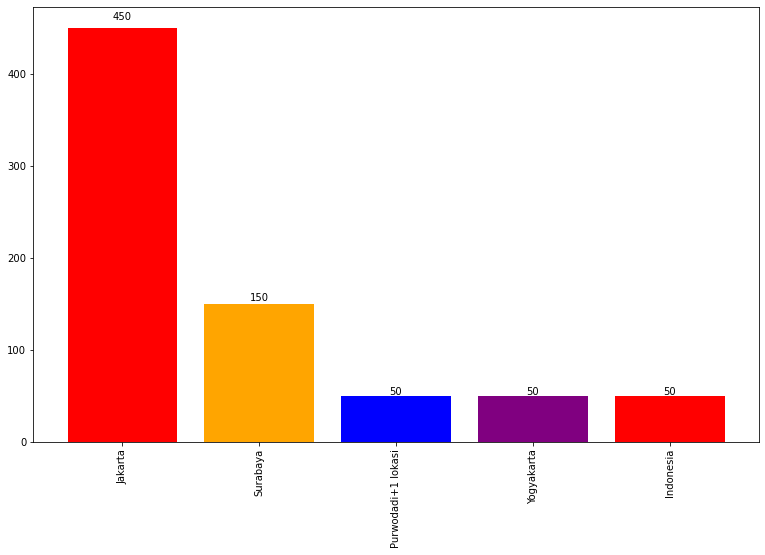

In [64]:
colors_list = ['Red','Orange', 'Blue', 'Purple']
ax = sample_df.Location.value_counts().plot(kind='bar', figsize=(13,8), width=0.8, color= colors_list, edgecolor=None)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

Jakarta               450
Surabaya              150
Purwodadi+1 lokasi     50
Yogyakarta             50
Indonesia              50
Name: Location, dtype: int64


<AxesSubplot:>

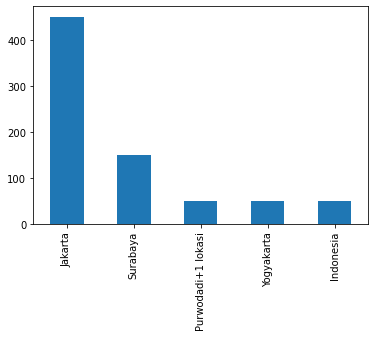

In [65]:
detail_location = sample_df.Location.value_counts()
print(detail_location)

sample_df.Location.value_counts().plot(kind = 'bar')

In [66]:
sample_df.loc[:,['Fee']]

,Fee
1,Rp.5.000.000-Rp.6.500.000
2,Rp.5.000.000-Rp.10.000.000
3,
4,
5,Rp.5.000.000
...,...
746,
747,Rp.4.000.000-Rp.6.000.000
748,Rp.8.000.000
749,


In [67]:
df2 = sample_df.copy()    

In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 1 to 750
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     750 non-null    object
 1   Company   750 non-null    object
 2   Location  750 non-null    object
 3   Fee       750 non-null    object
dtypes: object(4)
memory usage: 29.3+ KB


In [69]:
df2['Fee'].replace('',np.nan,inplace=True)

In [70]:
df2.isnull().sum()

Title         0
Company       0
Location      0
Fee         350
dtype: int64

In [71]:
rows_with_nan = [index for index, row in df2.iterrows() if row.isnull().any()]
rows_with_nan

[3,
 4,
 6,
 8,
 9,
 11,
 14,
 18,
 19,
 21,
 23,
 24,
 26,
 29,
 33,
 34,
 36,
 38,
 39,
 41,
 44,
 48,
 49,
 51,
 53,
 54,
 56,
 59,
 63,
 64,
 66,
 68,
 69,
 71,
 74,
 78,
 79,
 81,
 83,
 84,
 86,
 89,
 93,
 94,
 96,
 98,
 99,
 101,
 104,
 108,
 109,
 111,
 113,
 114,
 116,
 119,
 123,
 124,
 126,
 128,
 129,
 131,
 134,
 138,
 139,
 141,
 143,
 144,
 146,
 149,
 153,
 154,
 156,
 158,
 159,
 161,
 164,
 168,
 169,
 171,
 173,
 174,
 176,
 179,
 183,
 184,
 186,
 188,
 189,
 191,
 194,
 198,
 199,
 201,
 203,
 204,
 206,
 209,
 213,
 214,
 216,
 218,
 219,
 221,
 224,
 228,
 229,
 231,
 233,
 234,
 236,
 239,
 243,
 244,
 246,
 248,
 249,
 251,
 254,
 258,
 259,
 261,
 263,
 264,
 266,
 269,
 273,
 274,
 276,
 278,
 279,
 281,
 284,
 288,
 289,
 291,
 293,
 294,
 296,
 299,
 303,
 304,
 306,
 308,
 309,
 311,
 314,
 318,
 319,
 321,
 323,
 324,
 326,
 329,
 333,
 334,
 336,
 338,
 339,
 341,
 344,
 348,
 349,
 351,
 353,
 354,
 356,
 359,
 363,
 364,
 366,
 368,
 369,
 371,
 374,
 3

In [28]:
df2[df2.Fee.isnull()].index.tolist()
print(len(df2[df2.Fee.isnull()].index.tolist()))

140


In [72]:
df2.dropna(axis=0,inplace=True)

In [73]:
df2

,Title,Company,Location,Fee
1,Data Analyst,PT Suntone Teknologi Internasional,Jakarta,Rp.5.000.000-Rp.6.500.000
2,Bussiness Analyst,PT. Makmur Jaya Sentosa,Surabaya,Rp.5.000.000-Rp.10.000.000
5,Data Analyst,PT MicroAd Indonesia,Jakarta,Rp.5.000.000
7,Admin Data Analyst,SMC GROUP,Jakarta,Rp.5.500.000-Rp.6.800.000
10,business analyst,PT Singgasana Mulia Kencana,Surabaya,Rp.5.000.000-Rp.10.000.000
...,...,...,...,...
742,Admin Data Analyst,SMC GROUP,Jakarta,Rp.5.500.000-Rp.6.800.000
745,business analyst,PT Singgasana Mulia Kencana,Surabaya,Rp.5.000.000-Rp.10.000.000
747,Business Analyst,PT Trisila Jaya Sentosa,Surabaya,Rp.4.000.000-Rp.6.000.000
748,Data Analyst,KitaBeli,Jakarta,Rp.8.000.000


In [74]:
juta=[]
for x in df2['Fee']:
    fee_juta = x[:][3:6]
    juta.append(fee_juta)

df2['Fee(juta)'] = juta
df2

,Title,Company,Location,Fee,Fee(juta)
1,Data Analyst,PT Suntone Teknologi Internasional,Jakarta,Rp.5.000.000-Rp.6.500.000,5.0
2,Bussiness Analyst,PT. Makmur Jaya Sentosa,Surabaya,Rp.5.000.000-Rp.10.000.000,5.0
5,Data Analyst,PT MicroAd Indonesia,Jakarta,Rp.5.000.000,5.0
7,Admin Data Analyst,SMC GROUP,Jakarta,Rp.5.500.000-Rp.6.800.000,5.5
10,business analyst,PT Singgasana Mulia Kencana,Surabaya,Rp.5.000.000-Rp.10.000.000,5.0
...,...,...,...,...,...
742,Admin Data Analyst,SMC GROUP,Jakarta,Rp.5.500.000-Rp.6.800.000,5.5
745,business analyst,PT Singgasana Mulia Kencana,Surabaya,Rp.5.000.000-Rp.10.000.000,5.0
747,Business Analyst,PT Trisila Jaya Sentosa,Surabaya,Rp.4.000.000-Rp.6.000.000,4.0
748,Data Analyst,KitaBeli,Jakarta,Rp.8.000.000,8.0


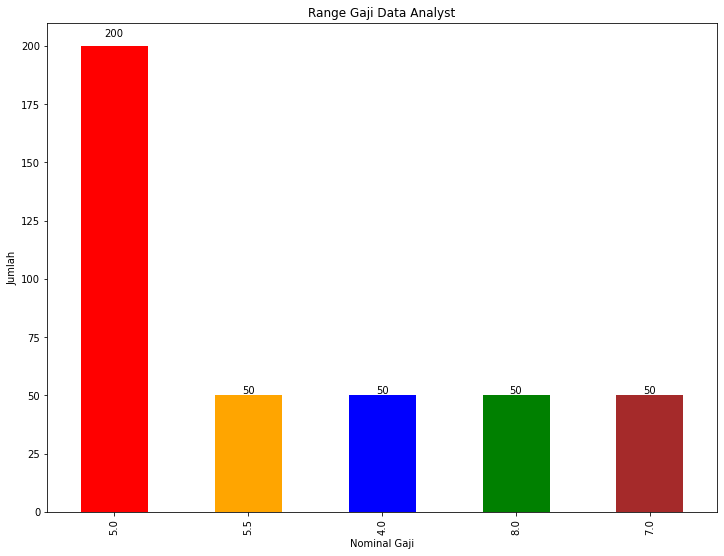

In [75]:
colors_list =['red','orange','blue','green','brown']
ax = df2['Fee(juta)'].value_counts(ascending=False).plot(kind='bar', figsize=(12,9), color=colors_list,
    title='Range Gaji Data Analyst', xlabel ='Nominal Gaji', ylabel ='Jumlah')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x,y = p.get_xy()
    ax.annotate (f'{height}', (x+width/2, y+height*1.02), ha='center') 